epoch 1/1  error=-4.107220
epoch 1/1  error=0.718823
epoch 1/1  error=0.704035
Epoch 1/1, Total Loss: 1092.7663
epoch 1/1  error=-4.149520
epoch 1/1  error=0.715509
epoch 1/1  error=0.703237
Epoch 1/1, Total Loss: 1050.9908
epoch 1/1  error=-4.197160
epoch 1/1  error=0.714198
epoch 1/1  error=0.703145
Epoch 1/1, Total Loss: 1079.7535
epoch 1/1  error=-4.255321
epoch 1/1  error=0.711589
epoch 1/1  error=0.702281
Epoch 1/1, Total Loss: 1061.1262
epoch 1/1  error=-4.279449
epoch 1/1  error=0.710833
epoch 1/1  error=0.700833
Epoch 1/1, Total Loss: 1045.6955
epoch 1/1  error=-4.355931
epoch 1/1  error=0.708940
epoch 1/1  error=0.699261
Epoch 1/1, Total Loss: 1034.5495
epoch 1/1  error=-4.379858
epoch 1/1  error=0.708215
epoch 1/1  error=0.699968
Epoch 1/1, Total Loss: 1036.0503
epoch 1/1  error=-4.422837
epoch 1/1  error=0.706298
epoch 1/1  error=0.698206
Epoch 1/1, Total Loss: 1061.4852
epoch 1/1  error=-4.474933
epoch 1/1  error=0.704866
epoch 1/1  error=0.697677
Epoch 1/1, Total Loss: 10

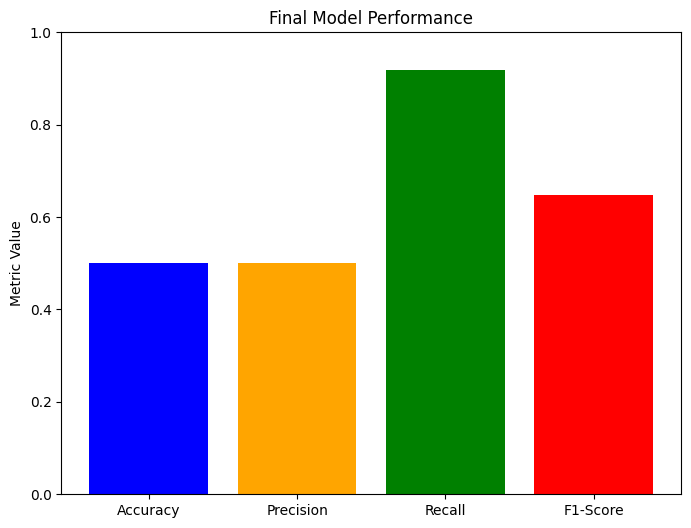

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from data_loader import load_phishing_emails, load_network_traffic_from_txt
from unified_network import UnifiedNetwork

phishing_emails, labels = load_phishing_emails('datasets/Phishing_Legitimate_full.csv')
network_traffic = load_network_traffic_from_txt('datasets/Train.txt')

min_samples = min(network_traffic.shape[0], labels.shape[0])
network_traffic = network_traffic[:min_samples]
labels = labels[:min_samples]

unified_network = UnifiedNetwork(input_shape=network_traffic.shape[1], phishing_email_shape=phishing_emails.shape[1])

# Train the neural network and track accuracy
epochs = 10

for epoch in range(epochs):
    unified_network.fit(network_traffic, phishing_emails, labels, epochs=1, learning_rate=0.000001)

predictions = unified_network.predict(network_traffic)
print(predictions)

# Create confusion matrix
predictions = np.array(predictions)
predicted_classes = np.argmax(predictions, axis=1)
probabilities = np.array([pred[0][1] for pred in predictions])
binary_predictions = (probabilities > 0.5).astype(int)

accuracy = accuracy_score(labels, binary_predictions)
precision = precision_score(labels, binary_predictions)
recall = recall_score(labels, binary_predictions)
f1 = f1_score(labels, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Metric Value')
plt.title('Final Model Performance')
plt.ylim(0, 1)
plt.show()
